<a href="https://colab.research.google.com/github/lutfiex/cyclegan-make-database/blob/main/succes_CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 16.81 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 18.1MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=d72eb7203ad8140e1db5e2988d139f171a91ae4a94f2efc3f9574c6cb3107db7
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=3e394550556f5a8a14fd00afc33e7f8cd94f3a2c475665062beb117ca467cf89
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [20]:
!bash ./datasets/download_cyclegan_dataset.sh cezanne2photo

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: ./datasets/cezanne2photo/trainB/2015-12-06 01:59:08.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-02-16 14:10:03.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-05-15 17:36:22.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-12-14 13:22:01.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2015-01-09 13:20:23.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-03-15 09:53:29.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-02-27 18:44:59.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2015-06-16 14:35:04.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-04-16 21:51:08.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-02-22 16:19:21.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2015-09-23 05:26:28.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-02-23 16:41:42.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-06-23 10:54:40.jpg  
  inflating: ./dat

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [21]:
!bash ./scripts/download_cyclegan_model.sh style_cezanne

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_cezanne]
for details.

--2021-05-14 07:53:13--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_cezanne.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints_dir/style_cezanne_pretrained/latest_net_G.pth’

./checkpoints_dir/s 100%[===================>]  43.46M  3.14MB/s    in 15s     

2021-05-14 07:53:28 (2.86 MB/s) - ‘./checkpoints_dir/style_cezanne_pretrained/latest_net_G.pth’ saved [45575747/4

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [26]:
!python test.py --dataroot datasets/cezanne2photo/testB --name style_cezanne_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints_dir             
                crop_size: 256                           
                 dataroot: datasets/cezanne2photo/testB  	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [29]:
%cd /content
!zip -r modif_cyclegan.zip pytorch-CycleGAN-and-pix2pix/


Output streaming akan dipotong hingga 5000 baris terakhir.
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2016-07-06 02:28:16.jpg (deflated 2%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2014-04-14 07:59:33.jpg (deflated 2%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2016-07-19 13:32:43.jpg (deflated 2%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2016-08-18 09:20:31.jpg (deflated 1%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2014-01-11 15:18:14.jpg (deflated 1%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2016-07-24 20:34:58.jpg (deflated 2%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2015-08-10 13:09:24.jpg (deflated 3%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2014-01-02 22:57:21.jpg (deflated 1%)
  adding: pytorch-CycleGAN-and-pix2pix/datasets/cezanne2photo/trainB/2015-12-05 10:23

# Visualize

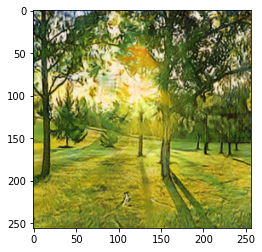

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/2014-08-01 17:41:55_fake.png')
plt.imshow(img)

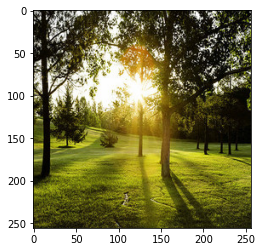

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./datasets/vangogh2photo/testB/2014-08-01 17:41:55.jpg')
plt.imshow(img)

In [ ]:
!zip -r /content/pytorch-CycleGAN-and-pix2pix.zip /content/pytorch-CycleGAN-and-pix2pix

Output streaming akan dipotong hingga 5000 baris terakhir.
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2016-02-10 11:27:47.jpg (deflated 3%)
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2016-06-21 04:14:44.jpg (deflated 2%)
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2016-12-26 02:46:40.jpg (deflated 1%)
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2015-02-11 00:28:14.jpg (deflated 1%)
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2016-03-24 20:59:14.jpg (deflated 1%)
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2015-07-28 19:35:52.jpg (deflated 2%)
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2015-11-28 10:04:43.jpg (deflated 2%)
  adding: content/pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainB/2015-11-16 19:10:12.jpg (deflated 1%)
  adding: content/pyt